# Autism Spectrum Disorder Predicting Model Using Machine Learning

Data: https://www.kaggle.com/datasets/uppulurimadhuri/dataset?select=data_csv.csv

##### Importing the Dependencies

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [119]:
import pandas as pd
df = pd.read_csv('data_csv.csv')
df.head()


,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [120]:
df.columns

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

In [121]:
import pandas as pd

# List of column names to drop
columns_to_drop = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',]

# Drop columns
df = df.drop(columns=columns_to_drop, axis=1)

In [122]:
df

,CASE_NO_PATIENT'S,A10_Autism_Spectrum_Quotient,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,1,3.0,2,3.0,Yes,Yes,Yes,Yes,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,0,6.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,7.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1.0,2,10.0,Yes,Yes,No,Yes,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,3.0,2,9.0,Yes,Yes,No,Yes,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1981,1,1.0,7,6.0,No,No,No,No,No,No,1,No,M,Middle Eastern,No,No,Health Care Professional,No
1981,1982,0,0.0,14,0.0,No,No,No,No,No,No,1,No,F,south asian,No,No,Health Care Professional,No
1982,1983,1,1.0,7,6.0,No,No,No,No,No,No,1,No,M,White European,No,No,Health Care Professional,Yes
1983,1984,0,0.0,14,0.0,No,No,No,No,No,No,1,No,M,Middle Eastern,No,No,Health Care Professional,No


In [123]:
# More column names to drop
columns_to_drop = ["CASE_NO_PATIENT'S","A10_Autism_Spectrum_Quotient","Qchat_10_Score","Ethnicity","Who_completed_the_test"]

df = df.drop(columns=columns_to_drop, axis=1)

In [124]:
df.shape

(1985, 14)

In [125]:
# Renaming the column 'ASD_traits' to 'Outcome' for clarity,
# and converting categorical responses ('Yes' and 'No') in the 'Outcome' column to numerical values (1 and 0) for analysis.

df = df.rename(columns={'ASD_traits': 'Outcome'})
df['Outcome'] = df['Outcome'].replace({'Yes': 1, 'No': 0})



In [126]:

df = df.rename(columns={'ASD_traits': 'Outcome'})
df['Outcome'] = df['Outcome'].replace({'Yes': 1, 'No': 0})
df['Speech Delay/Language Disorder']=df['Speech Delay/Language Disorder'].replace({'Yes': 1, 'No': 0})
df['Learning disorder']=df['Learning disorder'].replace({'Yes': 1, 'No': 0})
df['Genetic_Disorders']=df['Genetic_Disorders'].replace({'Yes': 1, 'No': 0})
df['Depression']=df['Depression'].replace({'Yes': 1, 'No': 0})
df['Global developmental delay/intellectual disability']=df['Global developmental delay/intellectual disability'].replace({'Yes': 1, 'No': 0})
df['Social/Behavioural Issues']=df['Social/Behavioural Issues'].replace({'Yes': 1, 'No': 0})
df['Anxiety_disorder']=df['Anxiety_disorder'].replace({'Yes': 1, 'No': 0})
df['Jaundice']=df['Jaundice'].replace({'Yes': 1, 'No': 0})
df['Family_mem_with_ASD']=df['Family_mem_with_ASD'].replace({'Yes': 1, 'No': 0})
df['Sex']=df['Family_mem_with_ASD'].replace({'M': 0, 'F': 1})





In [127]:
df.head(10)

,Social_Responsiveness_Scale,Age_Years,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Jaundice,Family_mem_with_ASD,Outcome
0,3.0,2,1,1,1,1.0,1,1.0,1,1,0,1,0,0
1,6.0,3,1,1,1,1.0,1,1.0,2,1,0,1,0,1
2,7.0,3,1,1,1,1.0,1,1.0,4,1,0,1,0,1
3,1.0,2,1,1,0,1.0,1,1.0,2,1,0,0,0,1
4,3.0,2,1,1,0,1.0,1,1.0,1,1,0,0,0,1
5,3.0,2,1,1,0,1.0,1,1.0,2,1,0,0,0,1
6,3.0,3,1,1,1,1.0,1,1.0,4,1,0,1,0,1
7,3.0,3,1,1,1,1.0,1,1.0,2,1,0,1,0,1
8,5.0,3,1,1,0,1.0,1,1.0,2,1,0,0,0,0
9,6.0,2,1,1,0,1.0,1,1.0,1,1,0,0,0,1


In [128]:
# Drop rows with any NaN value
df.dropna(inplace=True)


In [129]:
# getting the statistical measures of the data
df.describe()

,Social_Responsiveness_Scale,Age_Years,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Jaundice,Family_mem_with_ASD,Outcome
count,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000
mean,3.083631,9.618052,0.527282,0.535951,0.505354,0.525752,0.525752,0.525752,1.699133,0.524222,0.327384,0.771545,0.327384,0.538501
std,3.691156,4.301336,0.499382,0.498833,0.500099,0.499464,0.499464,0.499464,1.016820,0.499540,0.469378,0.419944,0.469378,0.498643
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,5.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
df['Outcome'].value_counts()

Outcome
1    1056
0     905
Name: count, dtype: int64

0 --> Not with ASD

1 --> With ASD

In [131]:
df.groupby('Outcome').mean()

,Social_Responsiveness_Scale,Age_Years,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Jaundice,Family_mem_with_ASD
Outcome,,,,,,,,,,,,,
0,1.942541,9.717127,0.354696,0.367956,0.340331,0.353591,0.352486,0.353591,1.472928,0.352486,0.184530,0.704972,0.184530
1,4.061553,9.533144,0.675189,0.679924,0.646780,0.673295,0.674242,0.673295,1.892992,0.671402,0.449811,0.828598,0.449811


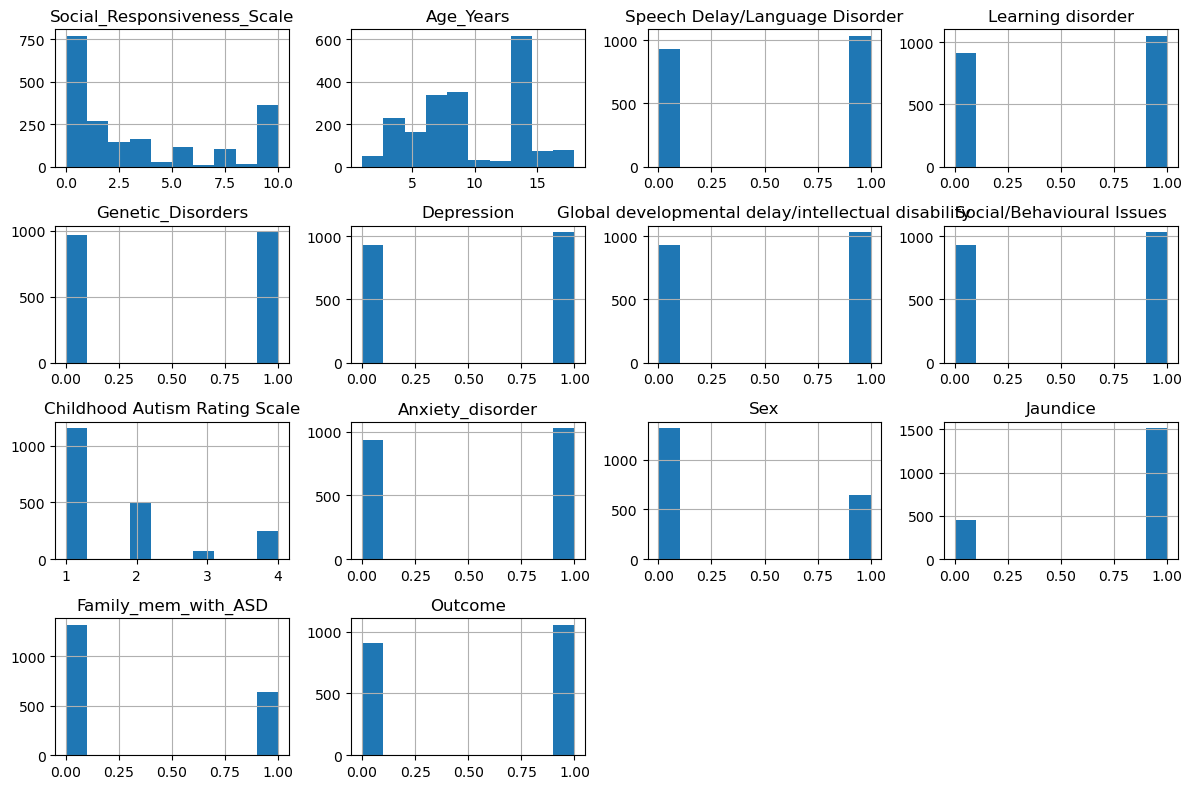

In [132]:

# Plot histograms for numerical features
numerical_features = df.select_dtypes(include=['int', 'float']).columns
df[numerical_features].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

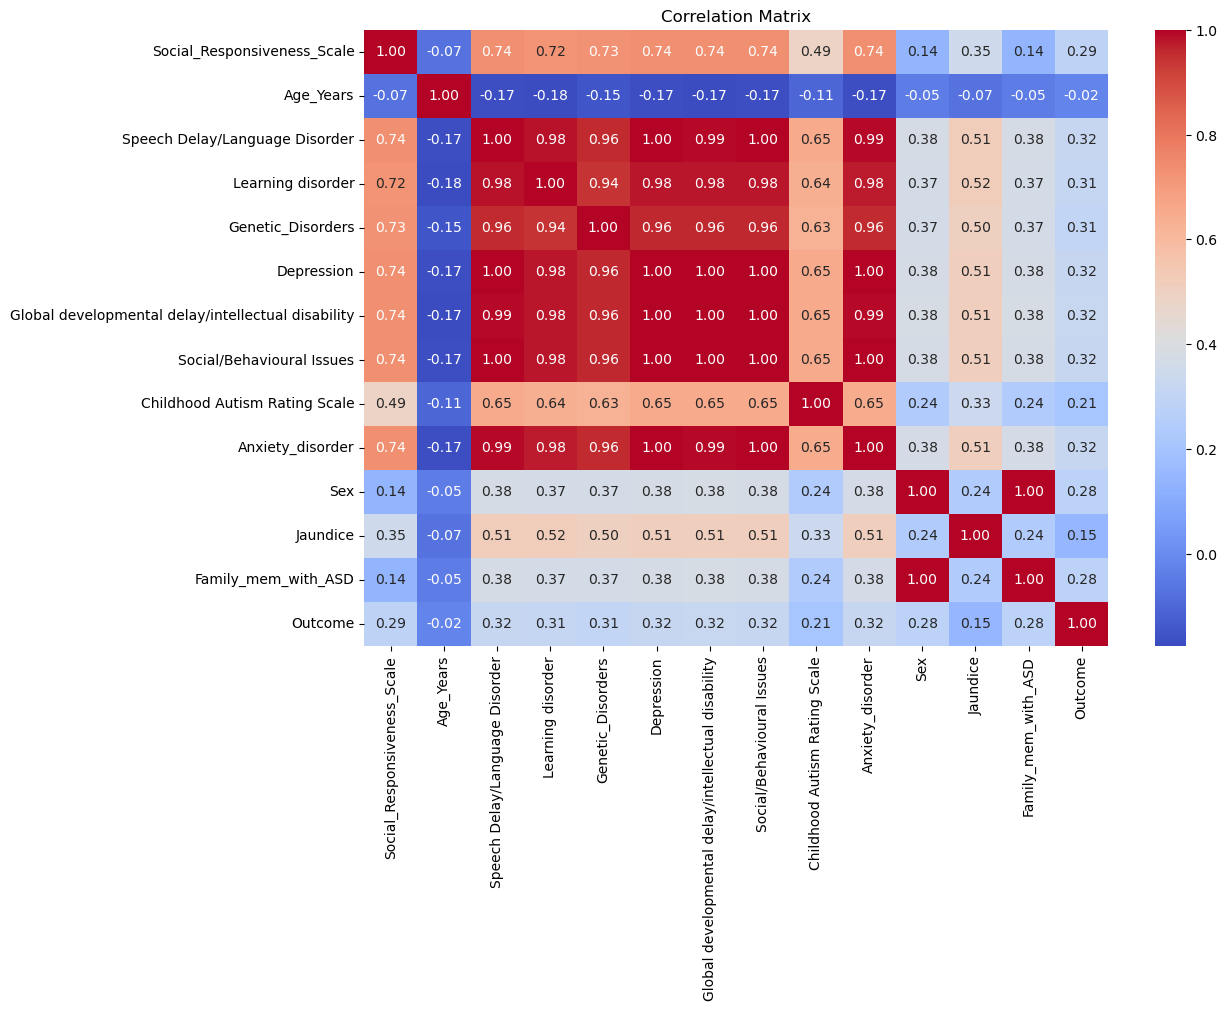

In [133]:
#Calculating the correlation matrix to explore relationships between variables
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

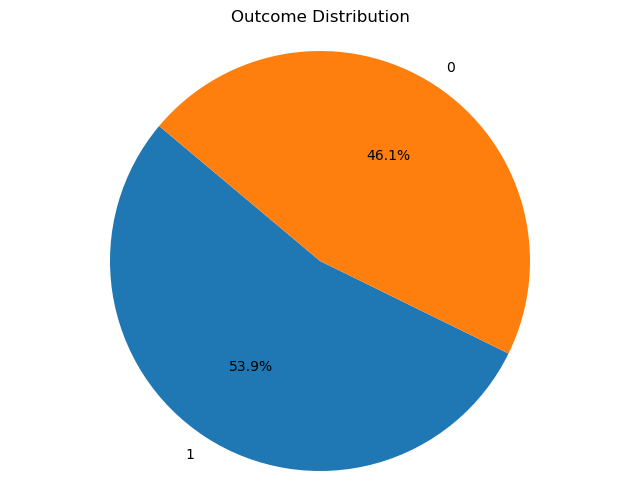

In [134]:
# Pie chart for Outcome
plt.figure(figsize=(8, 6))
plt.pie(df['Outcome'].value_counts(), labels=df['Outcome'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Outcome Distribution')
plt.axis('equal')
plt.show()


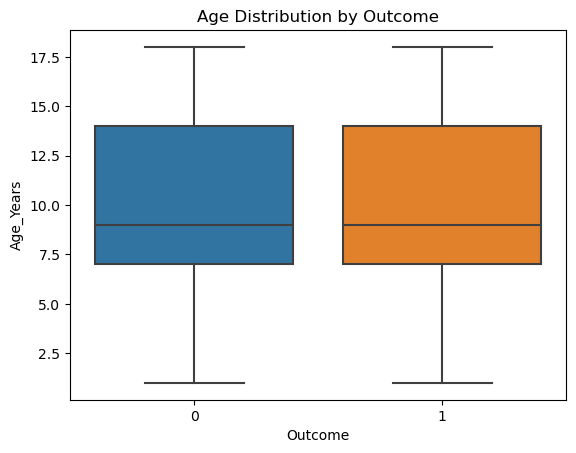

In [135]:
# Box plot for Age_Years by Outcome
sns.boxplot(x='Outcome', y='Age_Years', data=df)
plt.title('Age Distribution by Outcome')
plt.show()



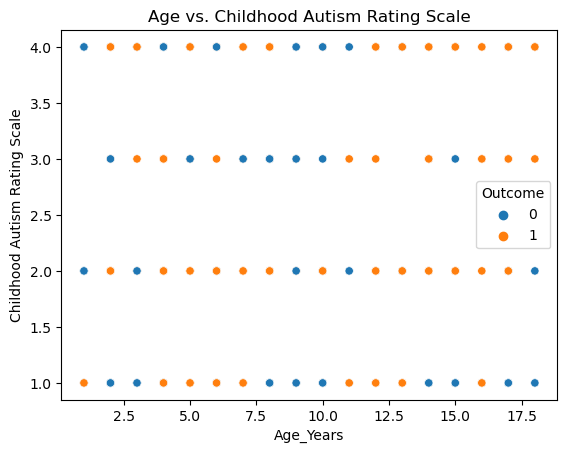

In [136]:
# Scatter plot for Age_Years vs. Childhood Autism Rating Scale
sns.scatterplot(x='Age_Years', y='Childhood Autism Rating Scale', hue='Outcome', data=df)
plt.title('Age vs. Childhood Autism Rating Scale')
plt.show()


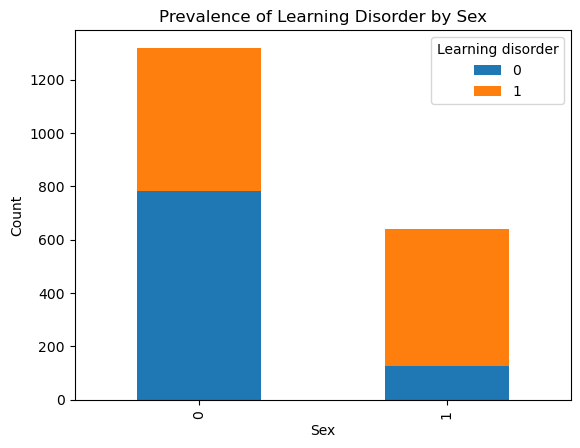

In [137]:
# Stacked bar chart for gender and Learning Disorder
sex_ld = df.groupby(['Sex', 'Learning disorder']).size().unstack()
sex_ld.plot(kind='bar', stacked=True)
plt.title('Prevalence of Learning Disorder by Sex')
plt.ylabel('Count')
plt.show()


In [138]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y =df['Outcome']


In [139]:
#Splitting the dataset into training and testing sets using train_test_split function
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

# Data Standardization

In [140]:
# Initializing a StandardScaler object for feature scaling.
scaler = StandardScaler()

In [141]:
scaler.fit(X)

StandardScaler()

In [142]:
standardized_data = scaler.transform(X)

In [143]:
print(standardized_data)

[[-0.02266285 -1.77154153  0.94684654 ... -0.69766208  0.54415114
  -0.69766208]
 [ 0.7902979  -1.53899632  0.94684654 ... -0.69766208  0.54415114
  -0.69766208]
 [ 1.06128481 -1.53899632  0.94684654 ... -0.69766208  0.54415114
  -0.69766208]
 ...
 [-0.56463669 -0.60881547 -1.05613735 ... -0.69766208 -1.83772472
  -0.69766208]
 [-0.8356236   1.01900103 -1.05613735 ... -0.69766208 -1.83772472
  -0.69766208]
 [-0.56463669 -0.60881547 -1.05613735 ... -0.69766208 -1.83772472
  -0.69766208]]


In [144]:
X = standardized_data
Y = df['Outcome']

In [145]:
print(X)
print(Y)

[[-0.02266285 -1.77154153  0.94684654 ... -0.69766208  0.54415114
  -0.69766208]
 [ 0.7902979  -1.53899632  0.94684654 ... -0.69766208  0.54415114
  -0.69766208]
 [ 1.06128481 -1.53899632  0.94684654 ... -0.69766208  0.54415114
  -0.69766208]
 ...
 [-0.56463669 -0.60881547 -1.05613735 ... -0.69766208 -1.83772472
  -0.69766208]
 [-0.8356236   1.01900103 -1.05613735 ... -0.69766208 -1.83772472
  -0.69766208]
 [-0.56463669 -0.60881547 -1.05613735 ... -0.69766208 -1.83772472
  -0.69766208]]
0       0
1       1
2       1
3       1
4       1
       ..
1980    0
1981    0
1982    1
1983    0
1984    1
Name: Outcome, Length: 1961, dtype: int64


# Training the Model

# SVM

In [146]:
classifier = SVC(random_state=0, probability=True)
classifier.fit(X_train,Y_train)

SVC(probability=True, random_state=0)

Model Evaluation

Accuracy Score

In [147]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [148]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7659033078880407


In [149]:
Y_true = Y_test  
Y_pred = classifier.predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute accuracy
accuracy = accuracy_score(Y_true, Y_pred)

# Compute precision
precision = precision_score(Y_true, Y_pred)

# Compute recall
recall = recall_score(Y_true, Y_pred)

# Compute F1-score
f1 = f1_score(Y_true, Y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7659033078880407
Precision: 0.7752293577981652
Recall: 0.7971698113207547
F1-score: 0.786046511627907


# KNN Classifier


In [151]:
from sklearn.neighbors import KNeighborsClassifier



In [152]:
knn = KNeighborsClassifier()



In [153]:
knn.fit(X_train, Y_train)



KNeighborsClassifier()

In [154]:
y_pred2=knn.predict(X_test)
y_pred2

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [155]:
accuracy_score(Y_test,y_pred2)

0.7175572519083969

# Logistic Regression


In [156]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [157]:
y_pred3 = model.predict(X_test)
y_pred3


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,

In [158]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3, Y_test)

0.7633587786259542

# Decision Tree Classifier



In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
model_dt=DecisionTreeClassifier(random_state = 48)



In [161]:
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=48)

In [162]:
y_pred4=model_dt.predict(X_test)
y_pred4

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [163]:
model_dt.score(X_test,Y_test)

0.6844783715012722

# Random Forest Classifier



In [164]:
from sklearn.ensemble import RandomForestClassifier



In [165]:
model_rf=RandomForestClassifier(n_estimators=100)



In [166]:
model_rf.fit(X_train,Y_train)



RandomForestClassifier()

In [167]:
y_pred5=model_rf.predict(X_test)
y_pred5


array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [168]:
model_rf.score(X_test,Y_test)



0.7048346055979644

# Roc curve

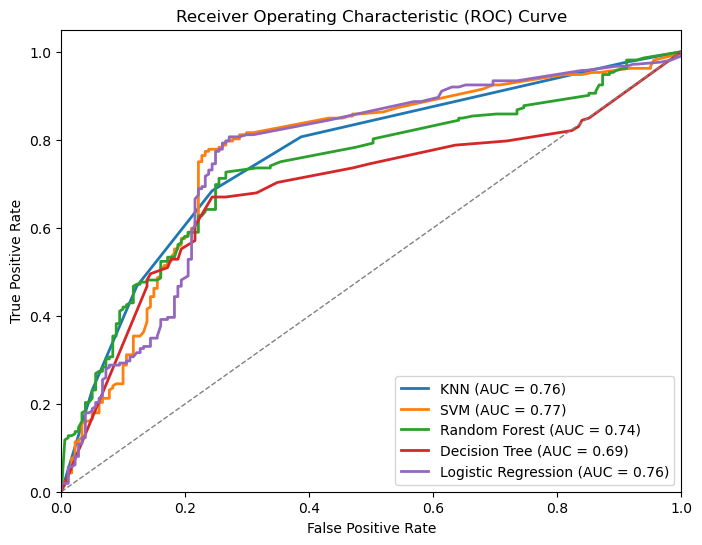

In [169]:
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Initialize models
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Train each model and compute ROC curve
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (name, roc_auc))

# Plot ROC curve for each model
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Cross validation score

In [170]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Perform cross-validation for each classifier
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_train, Y_train, cv=5)  # 5-fold cross-validation
    print(f"{name}:")
    print("Cross-validation scores:", cv_scores)
    print("Mean cross-validation score:", cv_scores.mean())
    print()


Logistic Regression:
Cross-validation scores: [0.74522293 0.69426752 0.72292994 0.69968051 0.69009585]
Mean cross-validation score: 0.7104393479986162

Decision Tree:
Cross-validation scores: [0.66878981 0.62420382 0.64968153 0.67731629 0.67412141]
Mean cross-validation score: 0.6588225717832359

Random Forest:
Cross-validation scores: [0.68471338 0.6656051  0.67834395 0.7028754  0.69329073]
Mean cross-validation score: 0.6849657109134937

SVM:
Cross-validation scores: [0.73248408 0.7133758  0.71656051 0.70926518 0.7284345 ]
Mean cross-validation score: 0.7200240125353574

KNN:
Cross-validation scores: [0.64649682 0.64968153 0.67515924 0.68051118 0.7028754 ]
Mean cross-validation score: 0.6709448322174966



# Making a Predictive System



In [171]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

# Your code for prediction goes here

# input_data = (3,18,1,1,1,1,1,1,2,1,0,1,1)
input_data = (0,4,0,0,0,0,0,0,1,0,1,1,0)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not with Autism spectrum disorder')
else:
  print('The person is with Autism spectrum disorder')

[[-0.8356236  -1.30645111 -1.05613735 -1.0746837  -1.01076678 -1.05290178
  -1.05290178 -1.05290178 -0.68774364 -1.04967713  1.43335869  0.54415114
  -0.69766208]]
[0]
The person is not with Autism spectrum disorder
